In [ ]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import SGDClassifier
import pickle

In [122]:
try:
    with open('mnist.pkl', 'rb') as handle:
        mnist = pickle.load(handle)
except FileNotFoundError:
    print('file not found: downloading from site')
    mnist = fetch_openml('mnist_784', version=1)
    try:
        with open('mnist.pkl', 'wb') as handle:
            pickle.dump(mnist,handle)
    except e:
        print('Error occured while trying to write file: {}'.format(e))



In [ ]:
mnist

In [124]:
X, y = mnist["data"], mnist["target"]
X.shape

(70000, 784)

In [125]:
y.shape

(70000,)

In [126]:
def display_one_digit(X,index=0):
    digit = X[index]
    digit_image = digit.reshape(28, 28)
    plt.imshow(digit_image, cmap=mpl.cm.binary)
    plt.axis("off")

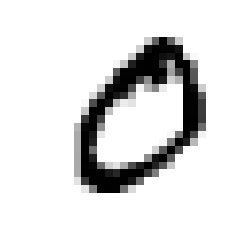

In [128]:
display_one_digit(X,1)

In [129]:
def plot_digits(input_images, images_per_row=10, **options):
    size = 28
    images_per_row = min(len(input_images), images_per_row)
    images = [img.reshape(size,size) for img in input_images]
    n_rows = (len(images) - 1) // images_per_row + 1
    row_images = []
    n_empty = n_rows * images_per_row - len(input_images)
    images.append(np.zeros((size, size * n_empty)))
    for row in range(n_rows):
        rimages = images[row * images_per_row : (row + 1) * images_per_row]
        row_images.append(np.concatenate(rimages, axis=1))
    image = np.concatenate(row_images, axis=0)
    plt.imshow(image, cmap = mpl.cm.binary, **options)
    plt.axis("off")

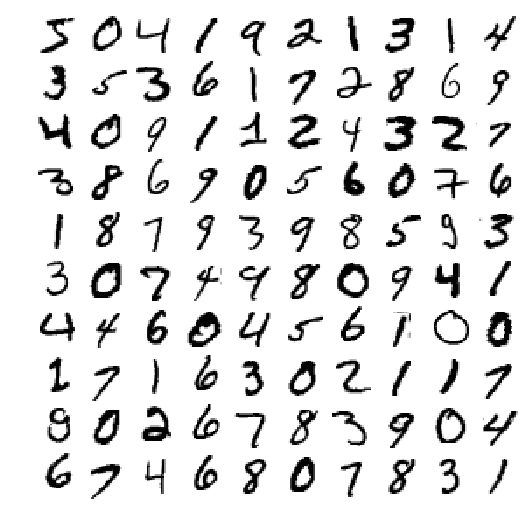

In [130]:
plt.figure(figsize=(9,9))
imgs = X[:100]
plot_digits(imgs, images_per_row=10)

In [131]:
y[4],y[6]

('9', '1')

In [132]:
X_train, X_test, y_train, y_test = train_test_split(X,y,stratify = y,shuffle = True,random_state=100)

In [ ]:
#X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [133]:
X_train.shape

(52500, 784)

In [134]:
y_train.shape

(52500,)

In [135]:
X_test.shape

(17500, 784)

In [136]:
y_test.shape

(17500,)

In [137]:
dt_clf = DecisionTreeClassifier()

In [138]:
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [139]:
dt_clf.score(X_test,y_test)

0.8733142857142857

In [140]:
dt_clf.predict([X_test[4]]),y_test[4]

(array(['6'], dtype=object), '6')

In [141]:
wrong_indices = np.where(predictions != y_test)
wrong_indices

(array([    3,    11,    14, ..., 17478, 17479, 17489], dtype=int64),)

In [142]:
def get_wrong_preds(model,X_test,y_test):
    predictions = model.predict(X_test)
    wrong_indices = np.where(predictions != y_test)
    wrong_predictions = predictions[wrong_indices]
    actual_predictions = y_test[wrong_indices]
    return [(wrong_indices[0][i],wrong_predictions[i],actual_predictions[i]) for i in range(len(wrong_predictions))]

In [143]:
wrong_ = get_wrong_preds(dt_clf,X_test,y_test)

In [147]:
wrong_

[(3, '9', '5'),
 (14, '9', '4'),
 (15, '3', '2'),
 (21, '3', '2'),
 (23, '3', '7'),
 (28, '2', '3'),
 (60, '7', '2'),
 (65, '8', '4'),
 (83, '3', '8'),
 (96, '0', '9'),
 (98, '6', '4'),
 (99, '4', '5'),
 (118, '2', '1'),
 (121, '6', '4'),
 (133, '0', '5'),
 (140, '0', '8'),
 (142, '9', '3'),
 (148, '4', '8'),
 (153, '3', '5'),
 (158, '7', '2'),
 (167, '7', '4'),
 (199, '4', '8'),
 (202, '8', '3'),
 (203, '9', '8'),
 (208, '4', '8'),
 (219, '5', '6'),
 (226, '3', '8'),
 (235, '7', '8'),
 (251, '7', '9'),
 (252, '2', '1'),
 (261, '3', '9'),
 (262, '2', '6'),
 (263, '9', '6'),
 (264, '5', '6'),
 (274, '8', '4'),
 (275, '6', '0'),
 (279, '2', '4'),
 (297, '2', '8'),
 (304, '8', '3'),
 (324, '0', '7'),
 (326, '4', '9'),
 (327, '3', '4'),
 (337, '9', '0'),
 (343, '6', '3'),
 (353, '0', '5'),
 (357, '3', '8'),
 (382, '9', '4'),
 (388, '3', '9'),
 (393, '9', '7'),
 (396, '9', '7'),
 (400, '7', '0'),
 (401, '7', '9'),
 (403, '8', '7'),
 (408, '0', '2'),
 (413, '3', '8'),
 (421, '8', '5'),
 (425

In [ ]:
indices = [wrong_[i][0] for i in range(len(wrong_))]
indices

In [ ]:
len(indices)

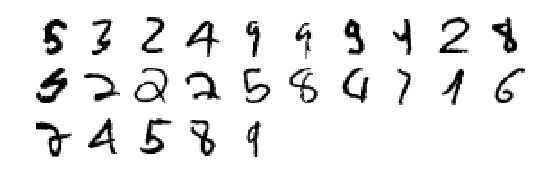

In [146]:
plt.figure(figsize=(9,9))
imgs = X_test[indices[:25]]
plot_digits(imgs, images_per_row=10)

In [148]:
sgd_clf = SGDClassifier(max_iter=1000, tol=1e-3, random_state=42,n_jobs=-1,early_stopping=True)
sgd_clf.fit(X_train, y_train)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=True, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=1000,
       n_iter=None, n_iter_no_change=5, n_jobs=-1, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=0.001,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [149]:
sgd_clf.score(X_test,y_test)

0.8232571428571429

In [150]:
dt_clf.predict([X_test[4]]),y_test[4]

(array(['6'], dtype=object), '6')

In [152]:
wrong_[:25]

[(0, '9', '1'),
 (3, '8', '5'),
 (9, '3', '5'),
 (10, '9', '3'),
 (11, '8', '1'),
 (18, '9', '7'),
 (21, '3', '2'),
 (26, '8', '2'),
 (31, '3', '5'),
 (34, '9', '4'),
 (42, '6', '1'),
 (56, '9', '7'),
 (90, '9', '7'),
 (107, '9', '5'),
 (112, '9', '4'),
 (117, '9', '4'),
 (121, '9', '4'),
 (126, '9', '7'),
 (134, '9', '7'),
 (135, '9', '3'),
 (137, '9', '0'),
 (145, '8', '2'),
 (148, '1', '8'),
 (153, '9', '5'),
 (158, '7', '2')]

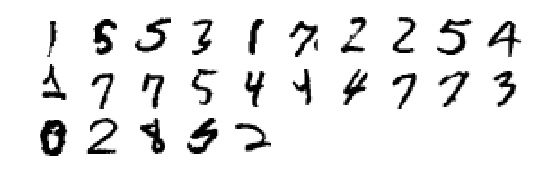

In [151]:
wrong_ = get_wrong_preds(sgd_clf,X_test,y_test)
indices = [wrong_[i][0] for i in range(len(wrong_))]
plt.figure(figsize=(9,9))
imgs = X_test[indices[:25]]
plot_digits(imgs, images_per_row=10)

In [153]:
rf_clf = RandomForestClassifier(n_jobs=-1,n_estimators=100)

In [154]:
rf_clf = rf_clf.fit(X_train,y_train)

In [155]:
rf_clf.score(X_test, y_test)

0.9697142857142858

In [157]:
rf.predict([X_test[4]]),y_test[4]

(array(['6'], dtype=object), '6')

In [158]:
wrong_ = get_wrong_preds(rf_clf,X_test,y_test)

In [160]:
wrong_[:25]

[(109, '3', '9'),
 (153, '0', '5'),
 (202, '8', '3'),
 (222, '6', '4'),
 (240, '1', '7'),
 (271, '7', '2'),
 (278, '3', '1'),
 (304, '8', '3'),
 (343, '5', '3'),
 (400, '9', '0'),
 (430, '8', '4'),
 (476, '6', '8'),
 (505, '6', '3'),
 (519, '9', '4'),
 (541, '0', '9'),
 (573, '8', '3'),
 (593, '7', '3'),
 (594, '6', '8'),
 (622, '6', '3'),
 (652, '4', '2'),
 (676, '7', '8'),
 (683, '6', '5'),
 (715, '9', '4'),
 (745, '3', '9'),
 (805, '4', '9')]

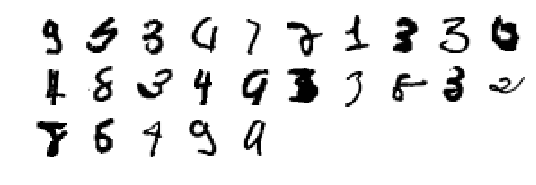

In [159]:
indices = [wrong_[i][0] for i in range(len(wrong_))]
plt.figure(figsize=(9,9))
imgs = X_test[indices[:25]]
plot_digits(imgs, images_per_row=10)

In [161]:
svm_clf = svm.LinearSVC(C=1.0)
svm_clf.fit(X_train, y_train)

C:\Users\MASTER\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)

In [162]:
print("Training set score: {:.3f}".format(svm_clf.score(X_train, y_train)))
print("Test set score: {:.3f}".format(svm_clf.score(X_test, y_test)))

Training set score: 0.839
Test set score: 0.820


In [163]:
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [164]:
svm_clf_2 = svm.LinearSVC(C=1.0)
svm_clf_2.fit(X_train_scaled, y_train)
print("Train set accuracy: {:.2f}".format(svm_clf_2.score(X_train_scaled, y_train)))
print("Test set accuracy: {:.2f}".format(svm_clf_2.score(X_test_scaled, y_test)))

C:\Users\MASTER\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


Train set accuracy: 0.92
Test set accuracy: 0.91


In [ ]:
wrong_ = get_wrong_preds(svm_clf_2,X_test_scaled,y_test)

In [ ]:
wrong_[:25]

In [ ]:
indices = [wrong_[i][0] for i in range(len(wrong_))]
plt.figure(figsize=(9,9))
imgs = X_test[indices[:25]]
plot_digits(imgs, images_per_row=10)

In [ ]:
DecisionTreeClassifier()